In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # advanced visualization library 
import warnings
warnings.filterwarnings('ignore') # filter warnings and deprecations

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
data = pd.read_csv('../input/Tweets.csv')

# Any results you write to the current directory are saved as output.

In [2]:
# get Familiar with data
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


Data Preprocessing****

In [3]:
# preprocessing
# treating missing values
data.isna().sum() # count the missing values in each column
data.isna().sum()*100/14640
# among all variables 3 variables have more than 90% of missing values so we should remove it


tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [4]:
data.columns # columns names

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
# removing redundant columns
df = data.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'name'], axis=1)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


****Visualization** 

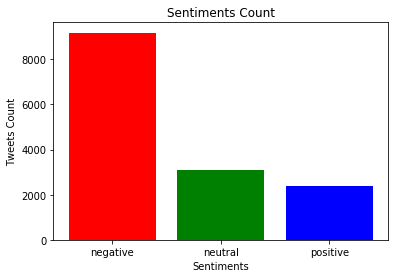

In [6]:
# data analysis through visualization 

df['airline_sentiment'].unique()
df['airline_sentiment'].value_counts()

# Count of tweets for different Sentiments
plt.bar(list(range(1,4)), df['airline_sentiment'].value_counts(), color = ['red', 'green', 'blue'])
plt.xticks(list(range(1,4)), ['negative', 'neutral', 'positive'])
plt.xlabel('Sentiments')
plt.ylabel('Tweets Count')
plt.title('Sentiments Count')
plt.show()


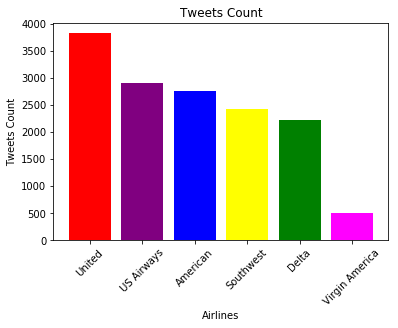

In [7]:
# Count of tweets for different airline
df['airline'].unique()
df['airline'].value_counts()
plt.bar(list(range(1,7)),df['airline'].value_counts(), color = ['red','purple', 'blue', 'yellow', 'green','magenta'])
plt.xticks(list(range(1,7)), ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America'], rotation=45)
plt.xlabel('Airlines')
plt.ylabel('Tweets Count')
plt.title('Tweets Count')
plt.show()

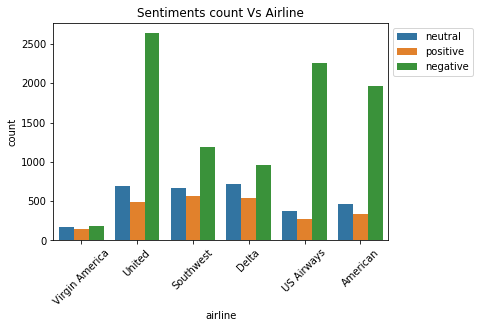

In [8]:
# Count of tweets for different sentiments for individual airline
sns.countplot(x = df['airline'], hue= df['airline_sentiment'])
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.title('Sentiments count Vs Airline')
plt.show()

# it can be observed that united airline has most negative tweets

<Figure size 720x576 with 0 Axes>

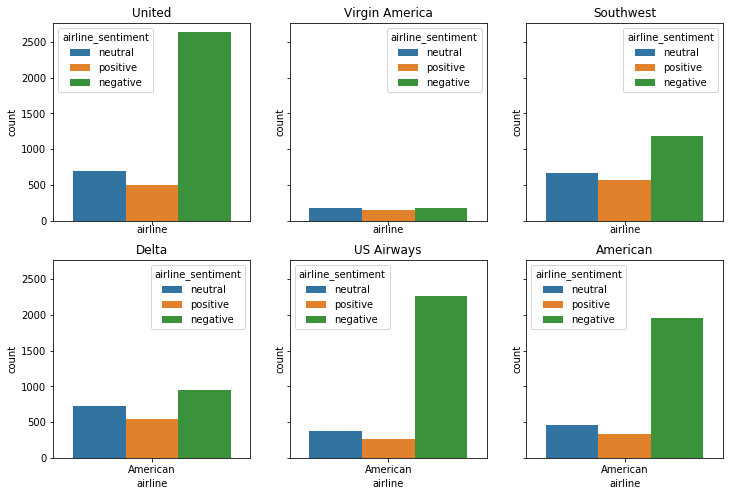

In [9]:
#count of each tweet for different airlines plotted on seperate plot using subplots by creating an array of plot 

plt.figure(figsize=(10,8))
f, ax = plt.subplots(2,3, figsize=(12,8), sharey=True, sharex=True)

sns.countplot(x = df[df['airline']=='United']['airline'], hue= df['airline_sentiment'], ax= ax[0,0])
ax[0,0].set_title('United')

sns.countplot(x = df[df['airline']=='Virgin America']['airline'], hue= df['airline_sentiment'], ax= ax[0,1])
ax[0,1].set_title('Virgin America')


sns.countplot(x = df[df['airline']=='Southwest']['airline'], hue= df['airline_sentiment'], ax= ax[0,2])
ax[0,2].set_title('Southwest')

sns.countplot(x = df[df['airline']=='Delta']['airline'], hue= df['airline_sentiment'], ax= ax[1,0])
ax[1,0].set_title('Delta')

sns.countplot(x = df[df['airline']=='US Airways']['airline'], hue= df['airline_sentiment'], ax= ax[1,1])
ax[1,1].set_title('US Airways')

sns.countplot(x = df[df['airline']=='American']['airline'], hue= df['airline_sentiment'], ax= ax[1,2])
ax[1,2].set_title('American')

plt.show()
# United got maximum negative tweets followed by US airways and American

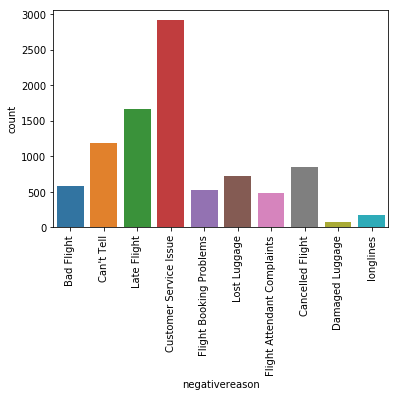

In [10]:
# Count of reasons for negative tweets for airlines, overall customer service issue was major problem
sns.countplot(x=df['negativereason'])
plt.xticks(rotation = 'vertical')
plt.show()

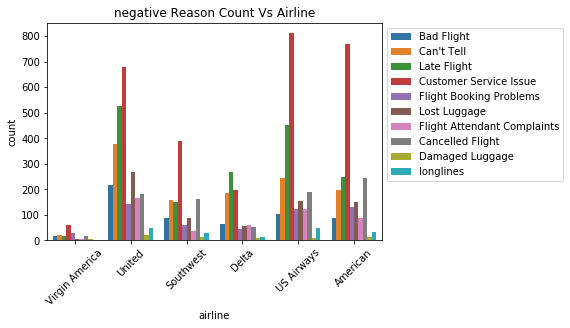

In [11]:
# US airways and American Airlines appears to have major customer service issue in the following plot
sns.countplot(x = df['airline'], hue= df['negativereason'])
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor = (1,1))
plt.title('negative Reason Count Vs Airline')
plt.show()

In [12]:
# Converting datetime column to pandas datetime format and keeping only date
df['date'] = pd.to_datetime(df['tweet_created'])
df['date'] = df['date'].apply(lambda x : x.date())
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,tweet_location,user_timezone,date
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),2015-02-24
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),2015-02-24
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),2015-02-24
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),2015-02-24
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),2015-02-24


It can be observed from graph that negative tweets for american airline doubled on 23rd and the again next day decreased

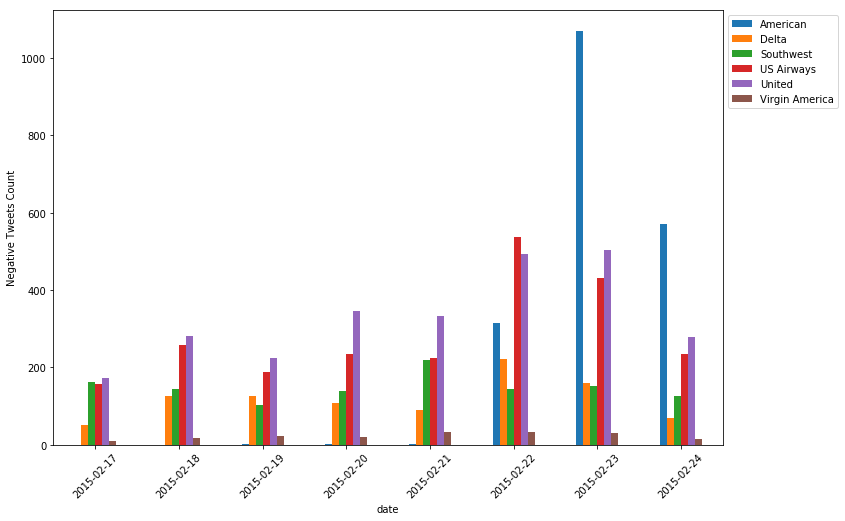

In [13]:
df1 = df.groupby(['date','airline','airline_sentiment']).size()
df1 = df1.loc(axis=0)[:,:,'negative']
axis = df1.groupby(['date', 'airline']).sum().unstack().plot(kind='bar', figsize=(12,8), rot=45)
axis.set_ylabel('Negative Tweets Count')
axis.legend(loc='upper left', bbox_to_anchor = (1,1))


**"Natural Language Processing"
"Creating Cloud of Words"**
**"Classification Model"**

In [14]:
from sklearn import re # text processing
import nltk # natural language processing package
from nltk.corpus import stopwords
from nltk import PorterStemmer # Class used to stem same words
ps = PorterStemmer()
from wordcloud import WordCloud, STOPWORDS # library to create cloud of words


In [15]:
df_negative = df[df['airline_sentiment']=='negative']
df_positive = df[df['airline_sentiment']=='positive']

In [16]:
def text_normalizer(text):
    tweet = re.sub('[^a-zA-Z]', ' ', text)
    tweet = ' '.join(tweet.split()[1:])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [word for word in tweet if not word in stopwords.words('english')]
    tweet = [ps.stem(word) for word in tweet]
    tweet = ' '.join(tweet)
    return tweet

In [17]:
df_negative['normalized_text'] = df_negative['text'].apply(text_normalizer)


In [18]:
df_positive['normalized_text'] = df_positive['text'].apply(text_normalizer)


In [19]:
cleaned_words = " ".join(df_negative['normalized_text'])

In [20]:
cleaned_words_pos = " ".join(df_positive['normalized_text'])


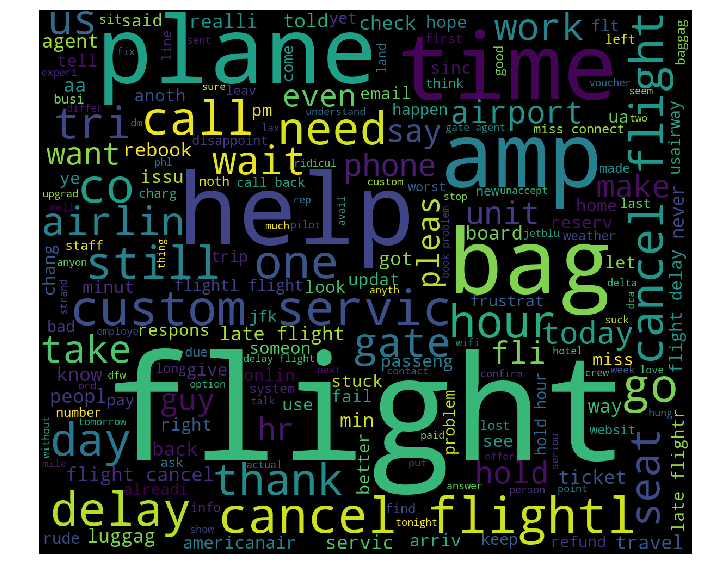

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=1200, height=1000)
wordcloud = wordcloud.generate(cleaned_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

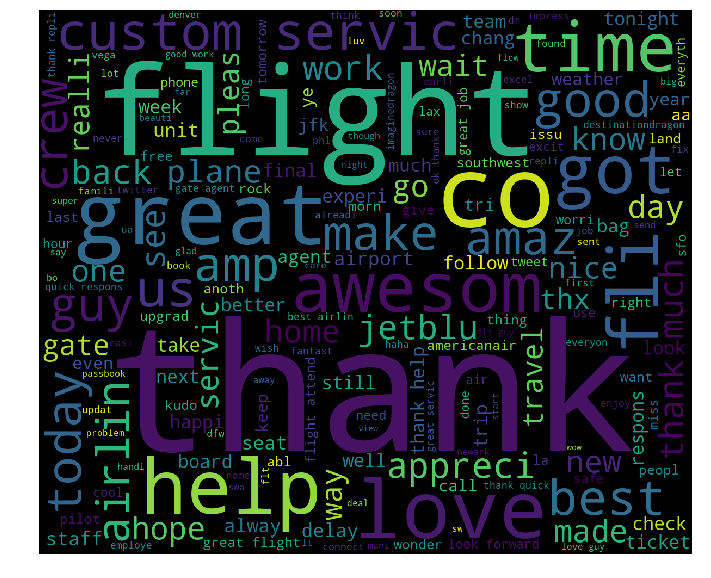

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS, width=1200, height=1000)
wordcloud = wordcloud.generate(cleaned_words_pos)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [23]:
df['normalized_text'] = df['text'].apply(text_normalizer)


In [24]:
# creating list of all processes tweets which is passes to countvectorizer to create sparse matrix
corpus = []
for i in range(0,14640):
    corpus.append(df['normalized_text'][i])
    


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
count_vectorizer = CountVectorizer(analyzer='word')
X = count_vectorizer.fit_transform(corpus)

label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(df.iloc[:,1].values)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
classifier1 = RandomForestClassifier(n_estimators=200)
classifier2 = DecisionTreeClassifier()
classifier3 = SVC(kernel='linear')


In [29]:
classifier1.fit(X_train,y_train)
y_pred1 = classifier1.predict(X_test)

In [30]:
classifier2.fit(X_train,y_train)
y_pred2 = classifier2.predict(X_test)

In [31]:
classifier3.fit(X_train,y_train)
y_pred3 = classifier3.predict(X_test)

In [32]:
print('Random Forest Classifier')
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test,y_pred1))

print('Decision Tree Classifier')
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test,y_pred2))

print('Support Vector Classifier')
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test,y_pred3))

Random Forest Classifier
[[2763  246   76]
 [ 432  477   75]
 [ 200   97  466]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3085
           1       0.58      0.48      0.53       984
           2       0.76      0.61      0.68       763

    accuracy                           0.77      4832
   macro avg       0.72      0.66      0.69      4832
weighted avg       0.76      0.77      0.76      4832

Decision Tree Classifier
[[2466  427  192]
 [ 360  510  114]
 [ 186  130  447]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      3085
           1       0.48      0.52      0.50       984
           2       0.59      0.59      0.59       763

    accuracy                           0.71      4832
   macro avg       0.63      0.63      0.63      4832
weighted avg       0.71      0.71      0.71      4832

Support Vector Classifier
[[2657  324  104]
 [ 349  548   87]
 [ 153   92  518